In [12]:
%load_ext sql

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils
import pandas as pd

from scipy import signal 
%matplotlib notebook
%sql sqlite:///schema/test.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [79]:
# Load test data (RCH90b)
cur_experiment_id = 13
result = %sql select data from mic where experiment_id = :cur_experiment_id

mic_1 = np.array(result[0][0])
mic_2 = np.array(result[1][0])
mic_3 = np.array(result[2][0])

# Median filter the data
mic_1 = mov_median(mic_1, 51)
mic_2 = mov_median(mic_2, 51)
mic_3 = mov_median(mic_3, 51)

Done.


<IPython.core.display.Javascript object>


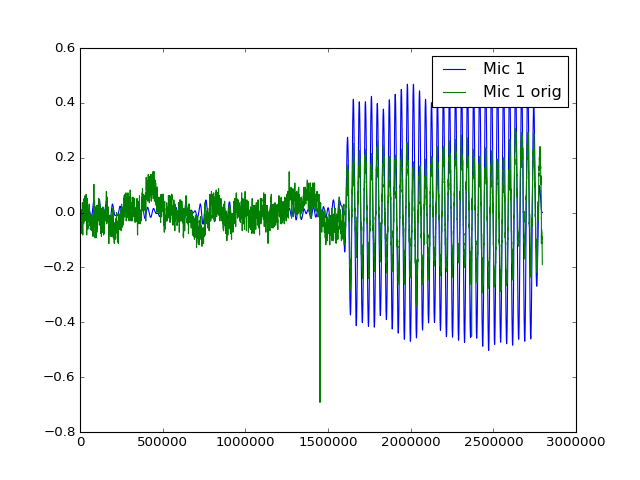

In [80]:
%matplotlib notebook
plt.figure(1)
plt.plot(normalize_signal(apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, mic_1)), label='Mic 1', lw=1)
plt.plot(normalize_signal(mic_1), label='Mic 1 orig', lw=1)
#plt.plot(mic_2, label='Mic 2', lw=1)
#plt.plot(mic_3, label='Mic 3', lw=1)
plt.legend()
plt.show()

In [81]:
sig_butter = normalize_signal(apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, mic_1))
peakutils.peak.indexes(sig_butter, thres=0.6, min_dist=1000)

array([1618208, 1653126, 1689213, 1726203, 1762598, 1798188, 1834930,
       1870973, 1906637, 1943404, 1980101, 2016662, 2053429, 2089964,
       2126095, 2162060, 2198132, 2234654, 2271510, 2307858, 2343945,
       2380796, 2417507, 2453669, 2489528, 2525801, 2562199, 2598557,
       2634768, 2671490, 2708073, 2744441, 2779669])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


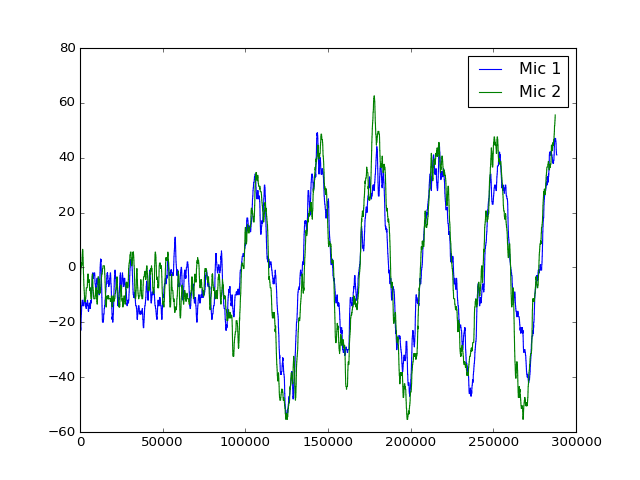

offset2 - offset1: -4484

xcorr: -4113

14518.6611811
gcc-phat: -5455



In [90]:
%load_ext autoreload
%autoreload 13
from locate import *

sig1 = mic_
sig2 = mic_2 

n = 5
sig1 = sig1 - np.mean(sig1)
sig2 = sig2 - np.mean(sig2)

# Crop each signal about peaks
sig1_cropped, _ , offset1, pk1_locs = find_peak_window(sig1, thres=0.6, min_dist=1000, n=n)
sig2_cropped, _ , offset2, pk2_locs = find_peak_window(sig2, thres=0.3, min_dist=1000,
                                                           n=None, closest_to=pk1_locs)
%matplotlib notebook
plt.figure(1)
plt.plot(sig1_cropped, label='Mic 1', lw=1)
plt.plot(sig2_cropped, label='Mic 2', lw=1)
plt.legend()
plt.show()

print("offset2 - offset1: %d\n" % (offset2 - offset1))
_, delay_xcor = xcorr(sig1_cropped, sig2_cropped)
print "xcorr: %r\n" % (delay_xcor + (offset2 - offset1))
fs = 9.5e6
max_delay = 0.3*math.sqrt(3)*fs/340
print max_delay
corr, delay_gcc = gcc_xcorr(sig1_cropped, sig2_cropped, max_delay, 200, 350, fs)
print "gcc-phat: %r\n" % (delay_gcc + (offset2 - offset1))
